#LOAN PREDICTON USING MACHINE LEARNING

Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set_style('dark')

from sklearn import svm

In [ ]:
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data_Set'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Mounting the drive with Google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing & loading of Data_Set:

In [ ]:
lt = pd.read_csv("/content/drive/MyDrive/Data_Set/LoanApprovalPrediction.csv")

In [ ]:
lt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
lt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Data_Set INFO:

In [ ]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
lt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

DATA SHAPE:
*   Data-set shape means to find  the total number of columns & rows in
     the given Data-set.for,that we use function (.shape).


In [ ]:
lt.shape

(598, 13)

Structure/Info:

*   By useing this we can find total details of Data-set.
     "Class type,shape,columns,rows,data type".




In [ ]:
print("Class Type:{}",type(lt))
print("Shape:{}",lt.shape)
print("COlumn:{}",lt.columns,sep="")
print("Rows:{}",lt.index,sep="")
print("Data-Type:{}",lt.dtypes,sep="")

Class Type:{} <class 'pandas.core.frame.DataFrame'>
Shape:{} (598, 13)
COlumn:{}Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Rows:{}RangeIndex(start=0, stop=598, step=1)
Data-Type:{}Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [ ]:
lt.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


Find the missing values in the DataSets

In [ ]:
lt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
lt['Dependents']= lt['Dependents'].fillna(lt['Dependents'].mean())

In [ ]:
lt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
lt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

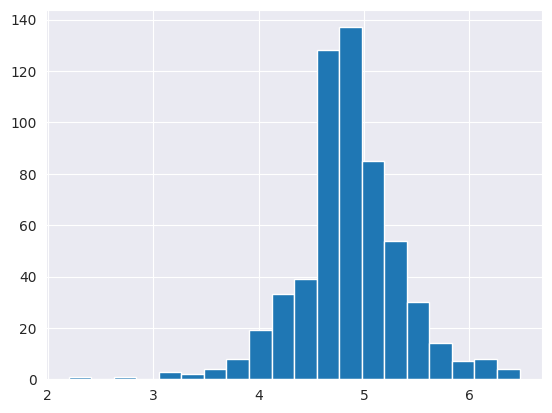

In [ ]:
lt['LoanAmount_log']= np.log(lt['LoanAmount'])
lt['LoanAmount_log'].hist(bins=20)

In [ ]:
lt.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
LoanAmount_log       21
dtype: int64

Cleaning the missing values in the Dataset

In [ ]:
lt['LoanAmount'].fillna(lt['LoanAmount'].mode()[0],inplace = True)
lt['Loan_Amount_Term'].fillna(lt['Loan_Amount_Term'].mode()[0],inplace = True)
lt['Credit_History'].fillna(lt['Credit_History'].mode()[0],inplace = True)

lt.LoanAmount = lt.LoanAmount. fillna(lt.LoanAmount.mean())
lt.LoanAmount_log = lt.LoanAmount_log.fillna(lt.LoanAmount_log.mean())


In [ ]:
lt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<Axes: >

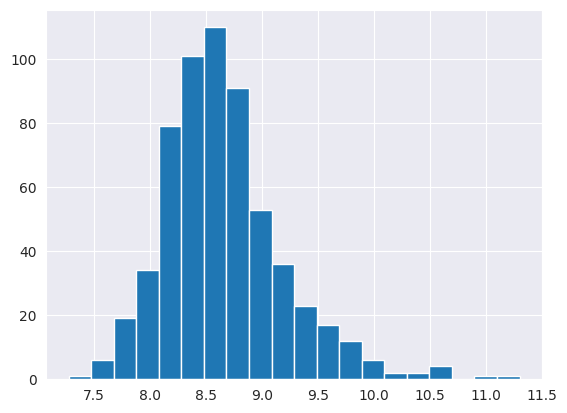

In [ ]:
lt['TotalIncome']= lt['ApplicantIncome']+lt['CoapplicantIncome']
lt['TotalIncome_log']= np.log(lt['TotalIncome'])
lt['TotalIncome_log'].hist(bins=20)

In [ ]:
 x= lt.iloc[:,np.r_[1:5,9:11,13:15]].values
 y= lt.iloc[:,12].values

In [ ]:
x

array([['Male', 'No', 0.0, ..., 1.0, 4.850145095517304, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y

In [ ]:
print("per of missing gender is %2f%%" %((lt['Gender'].isnull().sum()/lt.shape[0])*100))

per of missing gender is 0.000000%


Number of people who take loan as group by gender :
Male      487
Female    111
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

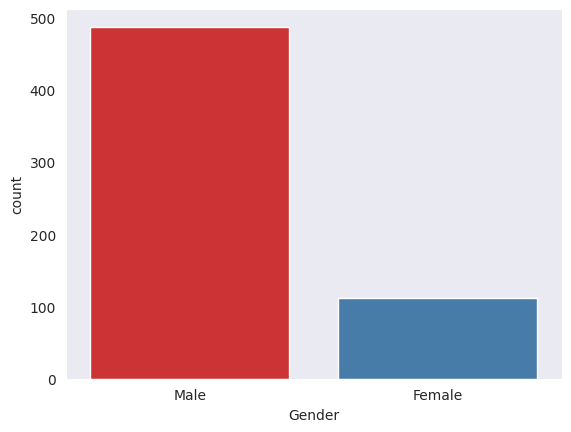

In [ ]:
print("Number of people who take loan as group by gender :")
print(lt['Gender'].value_counts())
sb.countplot(x='Gender', data=lt, palette= 'Set1')

Number of people who take loan as by martial status:
Yes    388
No     210
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

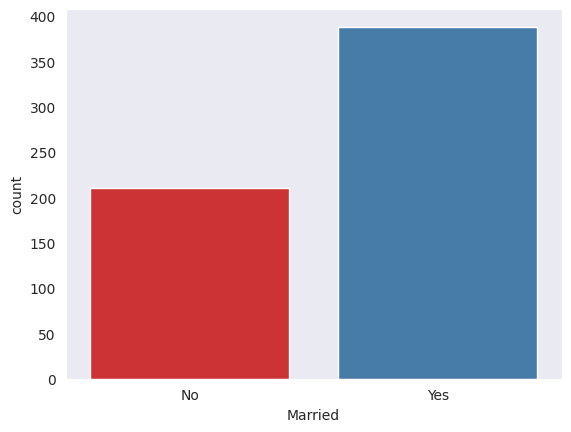

In [ ]:
print("Number of people who take loan as by martial status:")
print(lt['Married'].value_counts())
sb.countplot(x='Married' , data=lt, palette='Set1')

Number of people who take loan as by education:
Graduate        465
Not Graduate    133
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

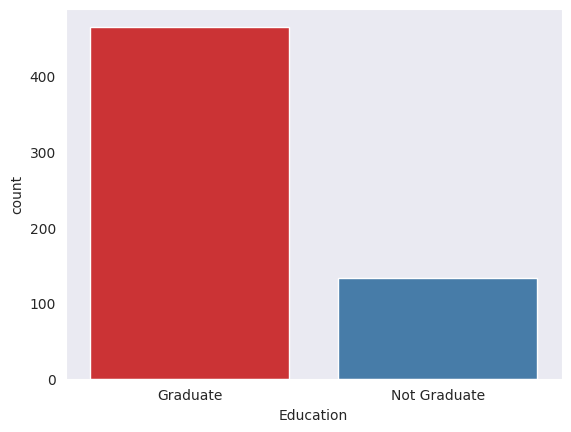

In [ ]:
print("Number of people who take loan as by education:")
print(lt['Education'].value_counts())
sb.countplot(x='Education', data=lt, palette='Set1')

Number of people who taken loan as group by loanamount:
120.0    41
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

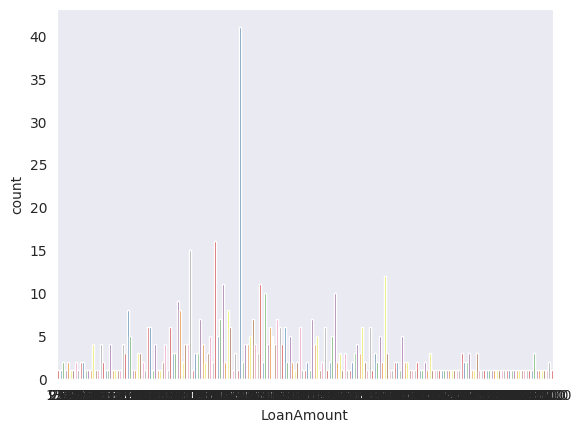

In [ ]:
print("Number of people who taken loan as group by loanamount:")
print(lt['LoanAmount'].value_counts())
sb.countplot(x='LoanAmount',data=lt, palette='Set1')

##The missingno Library:
Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. we will fill the misssing values in the data by ussing misssingno package

In [ ]:
import missingno as msno

<Axes: >

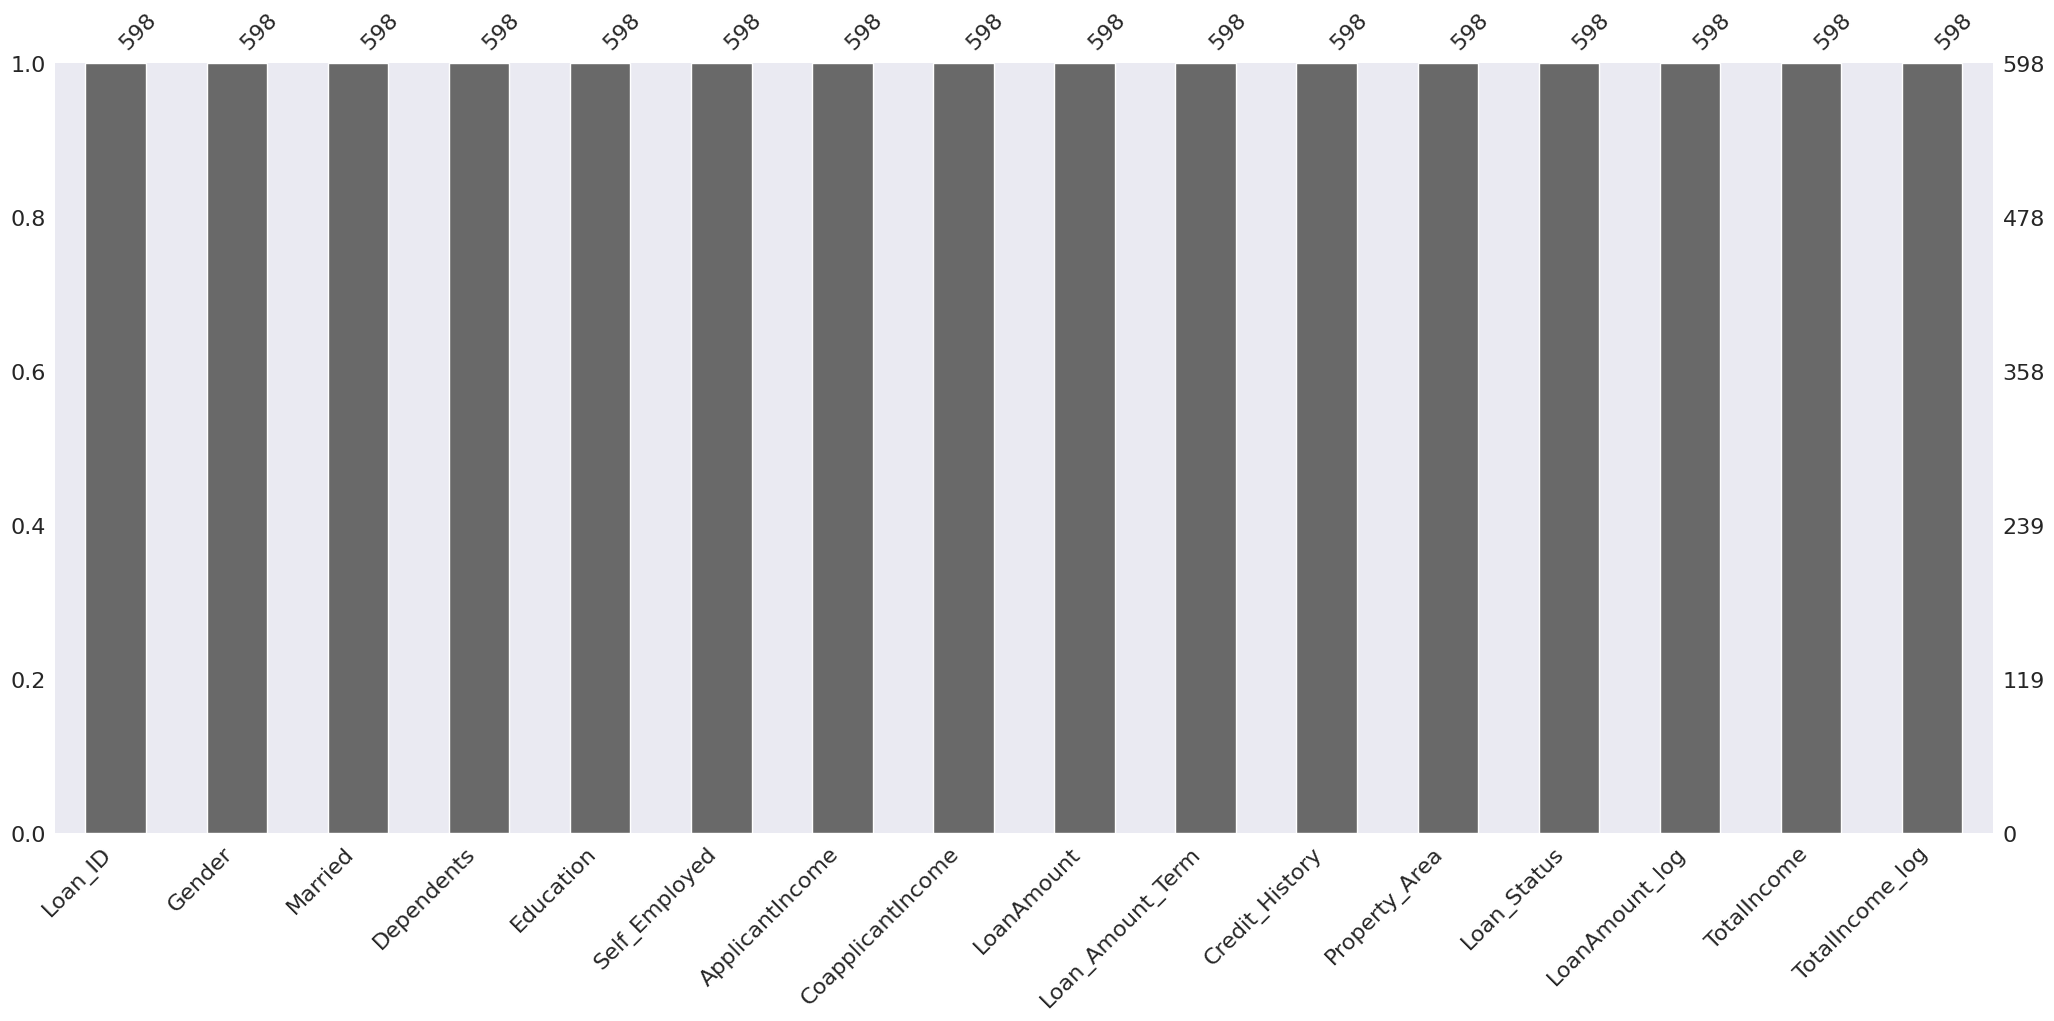

In [ ]:
msno.bar(lt)

#Data Visulaization

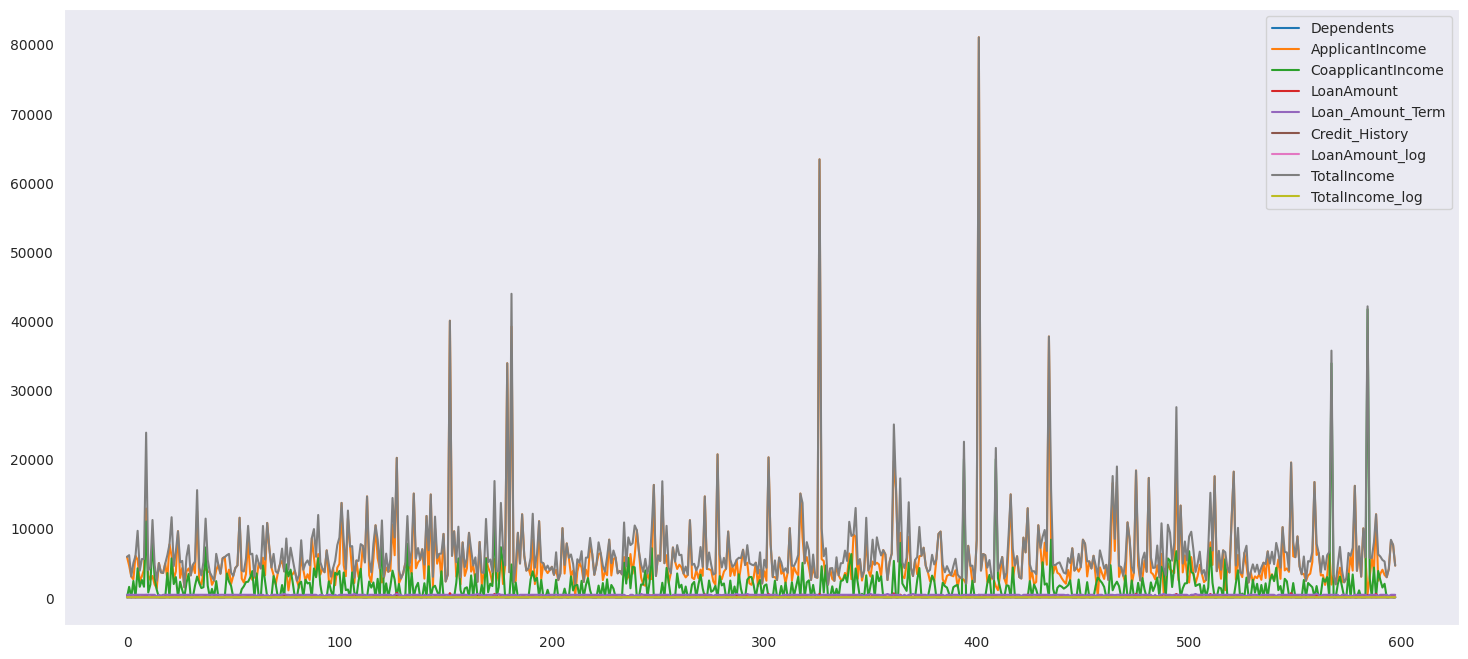

In [ ]:
lt.plot(figsize=(18,8))
plt.show()

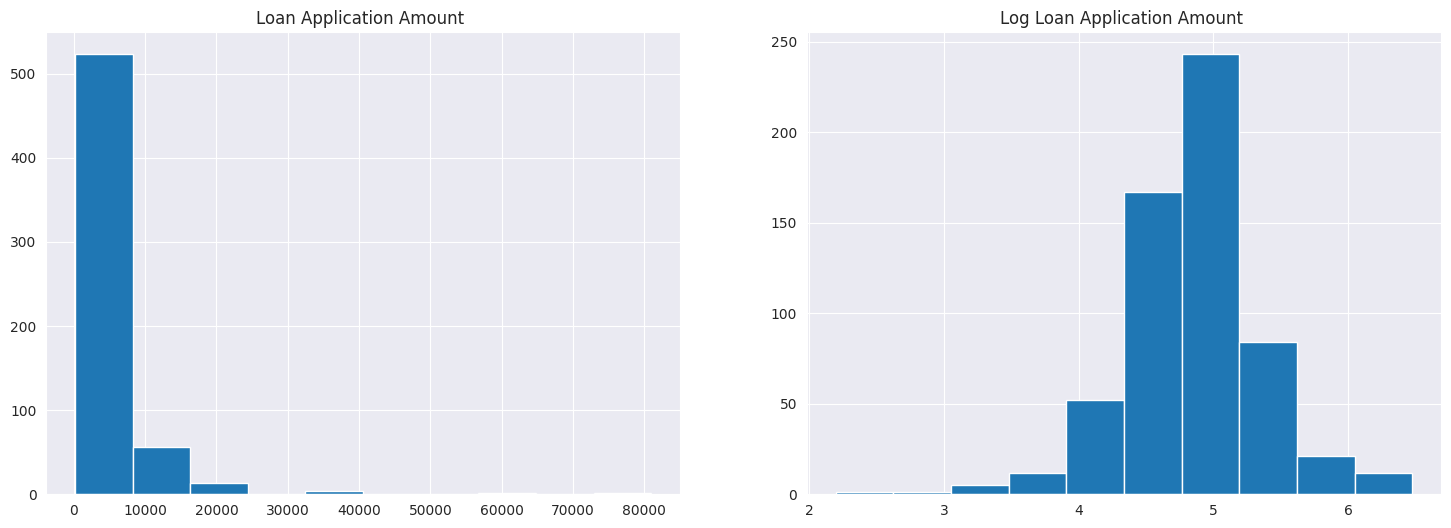

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


lt['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(lt['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

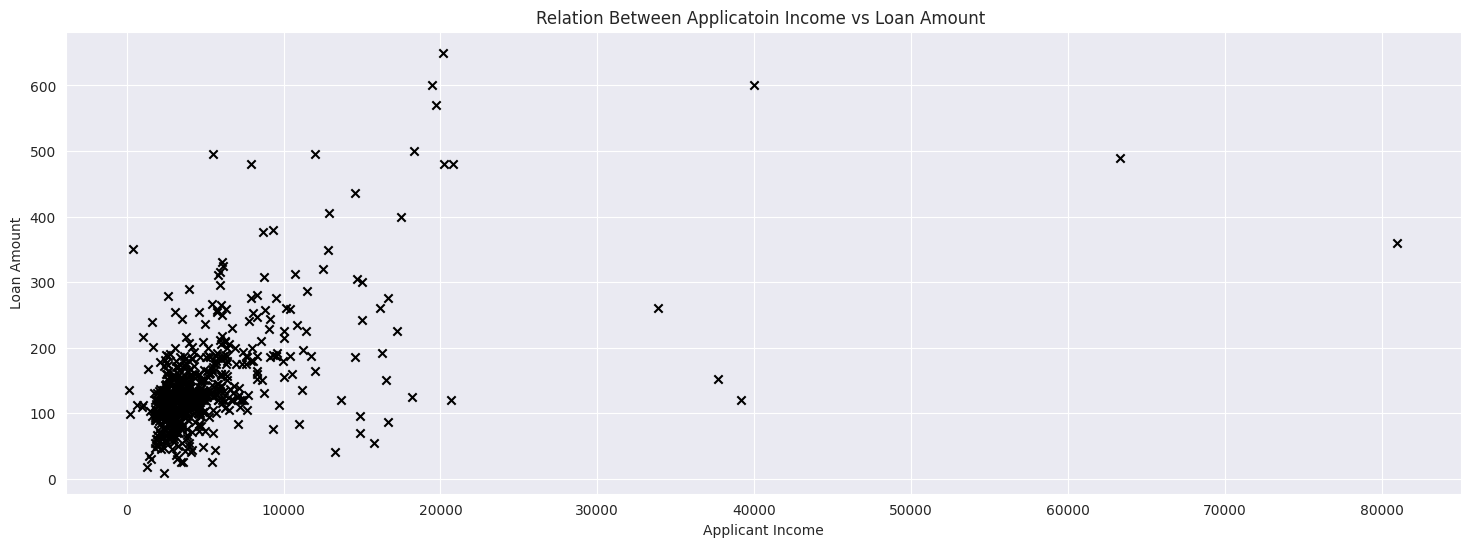

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(lt['ApplicantIncome'] , lt['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
corr = lt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
Dependents,1.00,0.08,0.03,0.13,-0.10,-0.05,0.14,0.10,0.09
ApplicantIncome,0.08,1.00,-0.11,0.52,-0.04,-0.03,0.41,0.88,0.71
CoapplicantIncome,0.03,-0.11,1.00,0.21,-0.06,0.01,0.21,0.37,0.40
LoanAmount,0.13,0.52,0.21,1.00,0.05,-0.01,0.90,0.59,0.68
Loan_Amount_Term,-0.10,-0.04,-0.06,0.05,1.00,-0.00,0.09,-0.06,-0.05
Credit_History,-0.05,-0.03,0.01,-0.01,-0.00,1.00,-0.03,-0.02,0.01
LoanAmount_log,0.14,0.41,0.21,0.90,0.09,-0.03,1.00,0.49,0.65
TotalIncome,0.10,0.88,0.37,0.59,-0.06,-0.02,0.49,1.00,0.85
TotalIncome_log,0.09,0.71,0.40,0.68,-0.05,0.01,0.65,0.85,1.00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])
  X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 3, ..., 1.0, 5.10594547390058, 399],
       [0, 0, 0, ..., 0.0, 4.634728988229636, 188],
       [1, 1, 2, ..., 1.0, 5.147494476813453, 321],
       ...,
       [1, 0, 0, ..., 0.0, 4.820281565605037, 197],
       [0, 0, 0, ..., 1.0, 4.787491742782046, 121],
       [1, 1, 3, ..., 1.0, 5.616771097666572, 419]], dtype=object)

In [ ]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_x.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
for i in range (0,5):
  X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 6, 1.0, 6.476972362889683, 114],
       [0, 0, 0, 0, 5, 1.0, 4.969813299576001, 72],
       [1, 1, 0, 0, 0, 1.0, 4.709530201312334, 87],
       [0, 0, 0, 0, 5, 1.0, 4.0943445622221, 8],
       [1, 1, 0, 0, 3, 1.0, 3.7376696182833684, 18],
       [1, 1, 1, 1, 5, 0.0, 5.0238805208462765, 80],
       [1, 0, 0, 0, 3, 1.0, 4.787491742782046, 98],
       [1, 0, 0, 1, 5, 1.0, 4.836281906951478, 43],
       [1, 1, 0, 0, 5, 1.0, 4.68213122712422, 57],
       [1, 1, 3, 0, 5, 1.0, 5.075173815233827, 78],
       [1, 1, 0, 0, 4, 1.0, 5.1647859739235145, 107],
       [1, 0, 0, 0, 5, 1.0, 4.976733742420574, 32],
       [1, 0, 0, 1, 3, 1.0, 4.0943445622221, 3],
       [1, 1, 3, 0, 5, 1.0, 5.231108616854587, 88],
       [1, 1, 0, 0, 5, 0.0, 4.77912349311153, 65],
       [1, 1, 4, 1, 5, 1.0, 5.153291594497779, 29],
       [0, 0, 0, 1, 5, 1.0, 4.787491742782046, 38],
       [1, 0, 0, 0, 5, 1.0, 4.941642422609304, 75],
       [1, 0, 2, 1, 5, 1.0, 5.247024072160486, 34],
       [1, 1, 0

In [ ]:
 4Labelencoder_y = LabelEncoder()
y_test = Labelencoder_x.fit_transform(y_test)

y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

##Applying Machine Learning Algorithms


*  Decision Tree
*  RandomForestClassifier
*  KNeighborsClassifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



##1.RandomForestClassifier
RandomForestClassifier is a class in scikit-learn, which is a popular machine learning library in Python. It is an implementation of the random forest algorithm for classification tasks. Random forests are an ensemble learning method that combines multiple decision trees to make predictions.

In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred =rf.predict(X_test)
y_pred



array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_pred = rf.predict(X_test)
print("Accuracy of RandomForestClassifier :",metrics.accuracy_score(y_pred, y_test))
print("Accuracy of RandomForestClassifier :",100*(metrics.accuracy_score(y_pred, y_test)))

Accuracy of RandomForestClassifier : 0.775
Accuracy of RandomForestClassifier : 77.5


##2.Decision Tree
A decision tree is a flowchart-like structure that represents a series of decisions and their possible consequences. In machine learning, a decision tree is a predictive modeling tool that uses a tree-like model of decisions and their possible outcomes to solve classification or regression problems.

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_pred = dt.predict(X_test)
print("Accuracy of Decision Tree :",metrics.accuracy_score(y_pred, y_test))
print("Accuracy of Decision Tree :",100*(metrics.accuracy_score(y_pred, y_test)))


Accuracy of Decision Tree : 0.675
Accuracy of Decision Tree : 67.5


##3.KNeighborsClassifier
The KNeighborsClassifier is a classification algorithm in machine learning that belongs to the category of instance-based or lazy learning algorithms. It is used for supervised learning tasks, specifically for classification problems.
The KNeighborsClassifier works by classifying a new data point based on the classes of its k nearest neighbors in the feature space. The "k" in KNeighborsClassifier refers to the number of neighbors considered in the classification process.

In [ ]:
kn =KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn.predict(X_test)
print("Accuracy of KNeighborsClassifiers :",metrics.accuracy_score(y_pred, y_test))
print("Accuracy of KNeighborsClassifiers :",100*(metrics.accuracy_score(y_pred, y_test)))


Accuracy of KNeighborsClassifiers : 0.8083333333333333
Accuracy of KNeighborsClassifiers : 80.83333333333333
